## YOLO + SAM Prediction

In [1]:

## Import Napari
## there is some error that happens if we import napari after importing other libraries so we import it first

import napari
viewer = napari.Viewer()

Import Yolo and setup paths

In [2]:
from segment_everything.prompt_generator import YoloDetector
from pathlib import Path
tnia_images_path = Path(r"D:\images")
tnia_images_path = Path(r"/home/bnorthan/images")
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_05_01_cellpose_ladybug')

Set up a default 8m YoloDetector and a second YoloDetector using the weights we trained in the fine tune notebook

In [3]:
yolo_detector1 = YoloDetector( str(parent_path / r"YOLO-training-2/100-epochs-ladybug/weights/best.pt"), "RegularYOLO", 'cuda')
yolo_detector_8m = YoloDetector( 'yolov8m.pt', "RegularYOLO", 'cuda')

WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/home/bnorthan/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Load the ladybug image

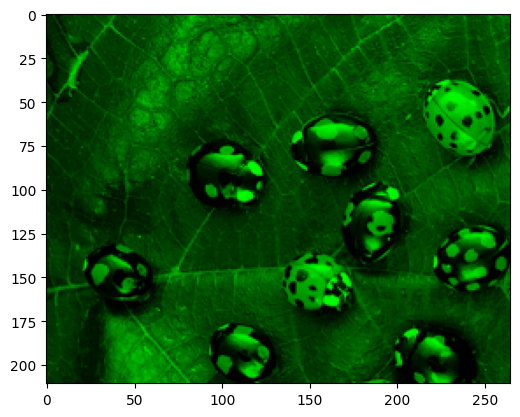

In [4]:
from skimage.io import imread
import matplotlib.pyplot as plt


img = imread(parent_path / r"522_img_crop.png")    
plt.imshow(img)

Generate bounding boxes with YOLO

In [5]:
results = yolo_detector1.get_results(img, conf=0.8, imgsz=512)

RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [6]:
test = results[0].plot(labels=False)
plt.figure(figsize=(15,15))
plt.imshow(test)

NameError: name 'results' is not defined

In [7]:
#results = yolo_detector_8m.predict(img)
results_8m = yolo_detector_8m.get_results(img, conf=0.1, imgsz=512)


RuntimeError: CUDA error: CUDA-capable device(s) is/are busy or unavailable
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [8]:
test = results_8m[0].plot(labels=False)
plt.figure(figsize=(15,15))
plt.imshow(test)

NameError: name 'results_8m' is not defined

Get the classes and the bounding boxes from the Yolo result

In [17]:
classes = results[0].boxes.cls.cpu().numpy()
bbs=results[0].boxes.xyxy.cpu().numpy()

Convert bounding boxes and classes to StackedLabels class and display in Napari

In [20]:
from segment_everything.stacked_labels import StackedLabels
stacked_labels = StackedLabels.from_yolo_results(bbs, classes, img)

In [21]:

from segment_everything.napari_helper import stacked_labels_to_napari
#viewer = napari.Viewer()
stacked_labels_to_napari(stacked_labels)

area 72 2704
label_num 1 27
solidity 1.0 1.0
circularity 0.8065549192167558 1
mean_intensity 39.19 133.27777777777777
10th_percentile_intensity 0.0 32.99999999999999
mean_hue 68.0 85.0
mean_saturation 204.0 255.0
predicted_iou 1 1
stability_score 1 1


Create a new stacked labels by segmenting the first stacked labels (with bounding boxes only) with MobileSAMV2

In [24]:
from segment_everything.detect_and_segment import segment_from_stacked_labels
new_stacked_labels = segment_from_stacked_labels(stacked_labels, "MobileSamV2") 

VIT checkpoint loaded successfully


In [23]:
stacked_labels_to_napari(new_stacked_labels)

area 22.0 1491.0
label_num 1 27
solidity 0.5641025641025641 0.975609756097561
circularity 0.643459194320178 1
mean_intensity 27.043478260869566 198.64705882352942
10th_percentile_intensity 0.0 98.60000000000001
mean_hue 59.130434782608695 85.0
mean_saturation 177.3913043478261 255.0
predicted_iou 0.39588719606399536 0.984914243221283
stability_score 0.7358490824699402 1.0
